### Counting K-mers from the sequence in fasta format

<img src="kmers.png" width="300">

A kmer is just a nucleotide sequence of a certain length.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
from itertools import product  #for cartesian product 

In [2]:
file = 'data_external/wuhan.fasta'
with open(file, 'r') as f:
    genome = ''.join([line.strip() for line in f.readlines()[1:]])

In [9]:
genome
len(genome)

29903

In [4]:
counts = [genome[i:i+2] for i in range(len(genome)) if len(genome[i:i+2]) == 2]
Counter(counts)

Counter({'AT': 2308,
         'TT': 3215,
         'TA': 2377,
         'AA': 2880,
         'AG': 1742,
         'GG': 1093,
         'GT': 1990,
         'AC': 2023,
         'CC': 888,
         'CT': 2081,
         'TC': 1413,
         'CA': 2084,
         'CG': 439,
         'GA': 1612,
         'TG': 2589,
         'GC': 1168})

In [5]:
def kmer_sequence(seq, k):
    my_dict = dict()
    counts = Counter(genome[i:i+k] for i in range(len(genome)) if len(genome[i:i+k]) == k)
    for k_mer in (''.join(t) for t in product('ACGT', repeat=k)):
        #print(f"count of {k_mer} is {counts[k_mer]}")
        my_dict[k_mer] = counts[k_mer]
    return my_dict
        

In [7]:
kmer_sequence(genome, 4)

{'AAAA': 281,
 'AAAC': 191,
 'AAAG': 205,
 'AAAT': 245,
 'AACA': 256,
 'AACC': 115,
 'AACG': 45,
 'AACT': 199,
 'AAGA': 209,
 'AAGC': 95,
 'AAGG': 120,
 'AAGT': 156,
 'AATA': 144,
 'AATC': 109,
 'AATG': 234,
 'AATT': 274,
 'ACAA': 285,
 'ACAC': 168,
 'ACAG': 161,
 'ACAT': 195,
 'ACCA': 151,
 'ACCC': 56,
 'ACCG': 29,
 'ACCT': 140,
 'ACGA': 36,
 'ACGC': 34,
 'ACGG': 30,
 'ACGT': 64,
 'ACTA': 173,
 'ACTC': 101,
 'ACTG': 157,
 'ACTT': 243,
 'AGAA': 205,
 'AGAC': 118,
 'AGAG': 132,
 'AGAT': 150,
 'AGCA': 86,
 'AGCC': 48,
 'AGCG': 22,
 'AGCT': 145,
 'AGGA': 90,
 'AGGC': 61,
 'AGGG': 53,
 'AGGT': 125,
 'AGTA': 107,
 'AGTC': 76,
 'AGTG': 146,
 'AGTT': 178,
 'ATAA': 160,
 'ATAC': 109,
 'ATAG': 91,
 'ATAT': 111,
 'ATCA': 137,
 'ATCC': 51,
 'ATCG': 21,
 'ATCT': 130,
 'ATGA': 187,
 'ATGC': 153,
 'ATGG': 175,
 'ATGT': 210,
 'ATTA': 219,
 'ATTC': 133,
 'ATTG': 189,
 'ATTT': 232,
 'CAAA': 213,
 'CAAC': 194,
 'CAAG': 120,
 'CAAT': 176,
 'CACA': 156,
 'CACC': 99,
 'CACG': 41,
 'CACT': 163,
 'CAGA': 167

/home/graviton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


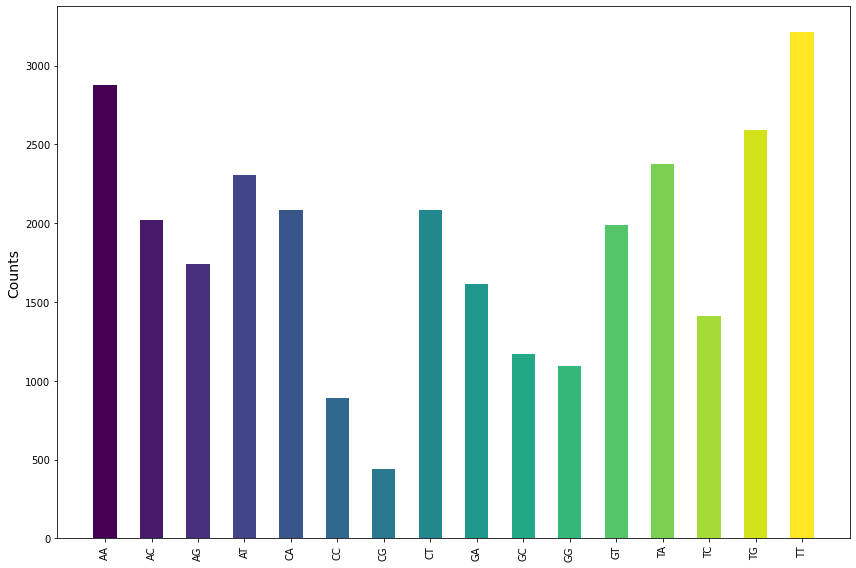

In [16]:
# import seaborn as sns
from matplotlib import cm
# sns.set(style = 'darkgrid')
k =2 
viridis = cm.get_cmap('viridis', len(kmer_sequence(genome, k)))
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(kmer_sequence(genome, k).keys(),kmer_sequence(genome, k).values(), color = viridis.colors, width = 0.5)

#ax.bar(wuhan_freq.keys(),wuhan_freq.values(), color = ['Black', 'Blue', 'Green', 'Yellow'])

ax.set_ylabel("Counts", fontsize = 14)
ax.set_xticklabels(kmer_sequence(genome, k).keys(),rotation=90, fontsize = 10)
    
plt.tight_layout()
del k